# SpecIRAF example (FITS)

This notebook demonstrates how to read an IRAF-style spectrum FITS file with `SpecIRAF`,
then **plot**, **smooth**, and **trim** the spectrum.

The object **J001554.18+560257.5** is from the survey for quasars behind the Galactic plane
(Fu et al. 2022, ApJS, 261, 32): https://ui.adsabs.harvard.edu/abs/2022ApJS..261...32F/abstract
and was observed with the **2.4m Lijiang Telescope (LJT)** in China.

It expects the example file to exist at:

- `specbox/examples/data/spec_J001554.18+560257.5_LJT.fits`


In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from specbox.basemodule import SpecIRAF

data_file = Path("../data/spec_J001554.18+560257.5_LJT.fits")
if not data_file.exists():
    raise FileNotFoundError(
        f"Missing example data file: {data_file}\n"
        "Add it under specbox/examples/data/ before running this notebook."
    )

spec = SpecIRAF(str(data_file))
spec.objname

'J001554.18+560257.53'

## Plot

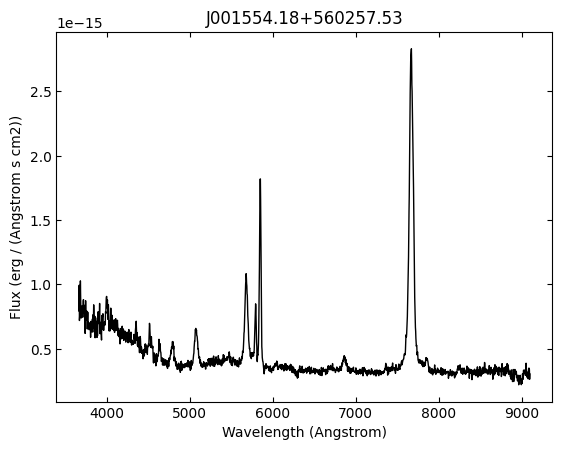

In [2]:
ax = spec.plot()
ax.set_title(spec.objname)
plt.show()

## Smooth

`smooth(..., inplace=False)` keeps the original spectrum and returns the same object (it stores the
smoothed flux on `spec.flux_sm`).

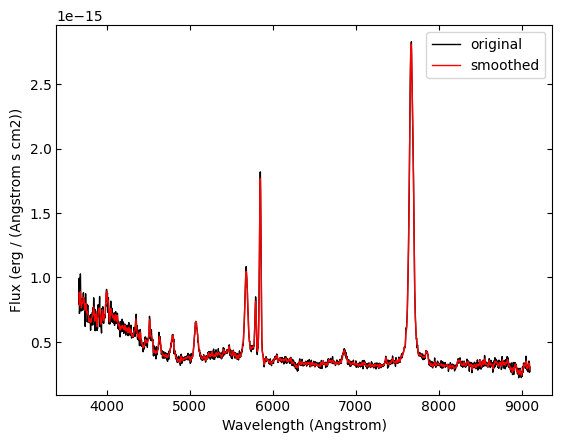

In [3]:
spec.smooth(window_length=9, polyorder=3, plot=True, inplace=False)
plt.show()

## Trim

Trim to a wavelength range (Angstrom). Use `inplace=False` to create a trimmed copy.

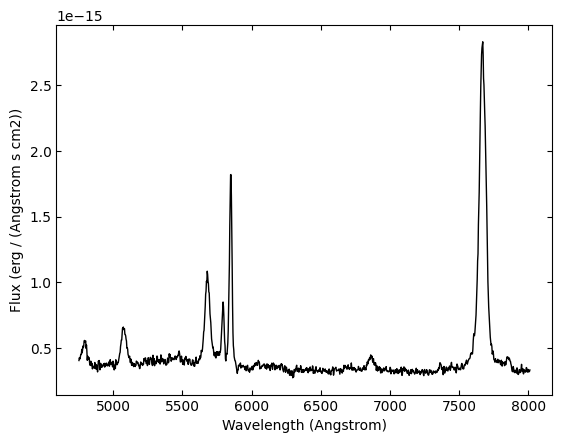

(4752.1895532183935, 8011.365667052776)

In [4]:
wave_min = float(spec.wave.value.min())
wave_max = float(spec.wave.value.max())

# Trim to the central 60% of the wavelength span as an example.
trim_range = (
    wave_min + 0.2 * (wave_max - wave_min),
    wave_min + 0.8 * (wave_max - wave_min),
)

trimmed = spec.trim(trim_range, plot=True, inplace=False)
plt.show()

trim_range